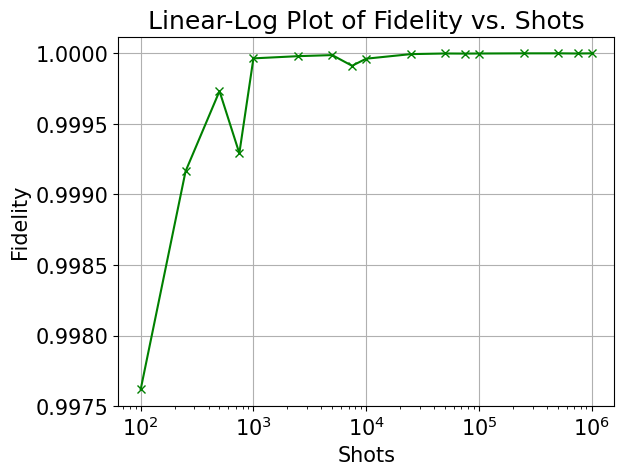

In [34]:
# task 1a
import numpy as np
import matplotlib.pyplot as plt

def read_line(file_path, line_number):
    with open(file_path, 'r') as file:
        for current_line_number, line in enumerate(file, start=1):
            if current_line_number == line_number:
                return line
    return None


shots = [
    100,     250,    500,    750,
    1000,    2500,   5000,   7500,
    10000,   25000,  50000,  75000,
    100000,  250000, 500000, 750000,
    1000000
]

fidelitys = []

for i in range(len(shots)):
    file_path = './data/task1a/task1a_shots_' + str(shots[i]) + '.out'
    line_number = 32
    fidelity = float(read_line(file_path, line_number).split()[1])
    fidelitys.append(fidelity)

plt.semilogx(shots, fidelitys, '-xg')
plt.grid(True)
plt.xlabel('Shots')
plt.ylabel('Fidelity')
plt.title('Linear-Log Plot of Fidelity vs. Shots')
plt.savefig(fname='task_1a_plot')

In [35]:
# getting job results
# from iqm.qiskit_iqm import IQMProvider
# from iqm.qiskit_iqm.iqm_job import IQMJob
# from dotenv import load_dotenv
# import os

# # load the variables from keys.sh
# load_dotenv("keys.sh")
# backend_method = 'garnet:mock'
# job_id = '067acc31-c3b8-7b3c-8000-0e423a836894'

# # save your IQM account for future loading
# API_KEY = os.getenv('IQM_API_KEY') # ${IQM_TOKEN} can't be set when using `token` parameter below
# server_url = f"https://cocos.resonance.meetiqm.com/{backend_method}"
# backend = IQMProvider(server_url, token=API_KEY).get_backend()


# job = IQMJob(backend, job_id)
# result = job.result()
# counts_device = result.get_counts()
# print(counts_device)

<built-in method values of dict object at 0x75ba6c40a780>


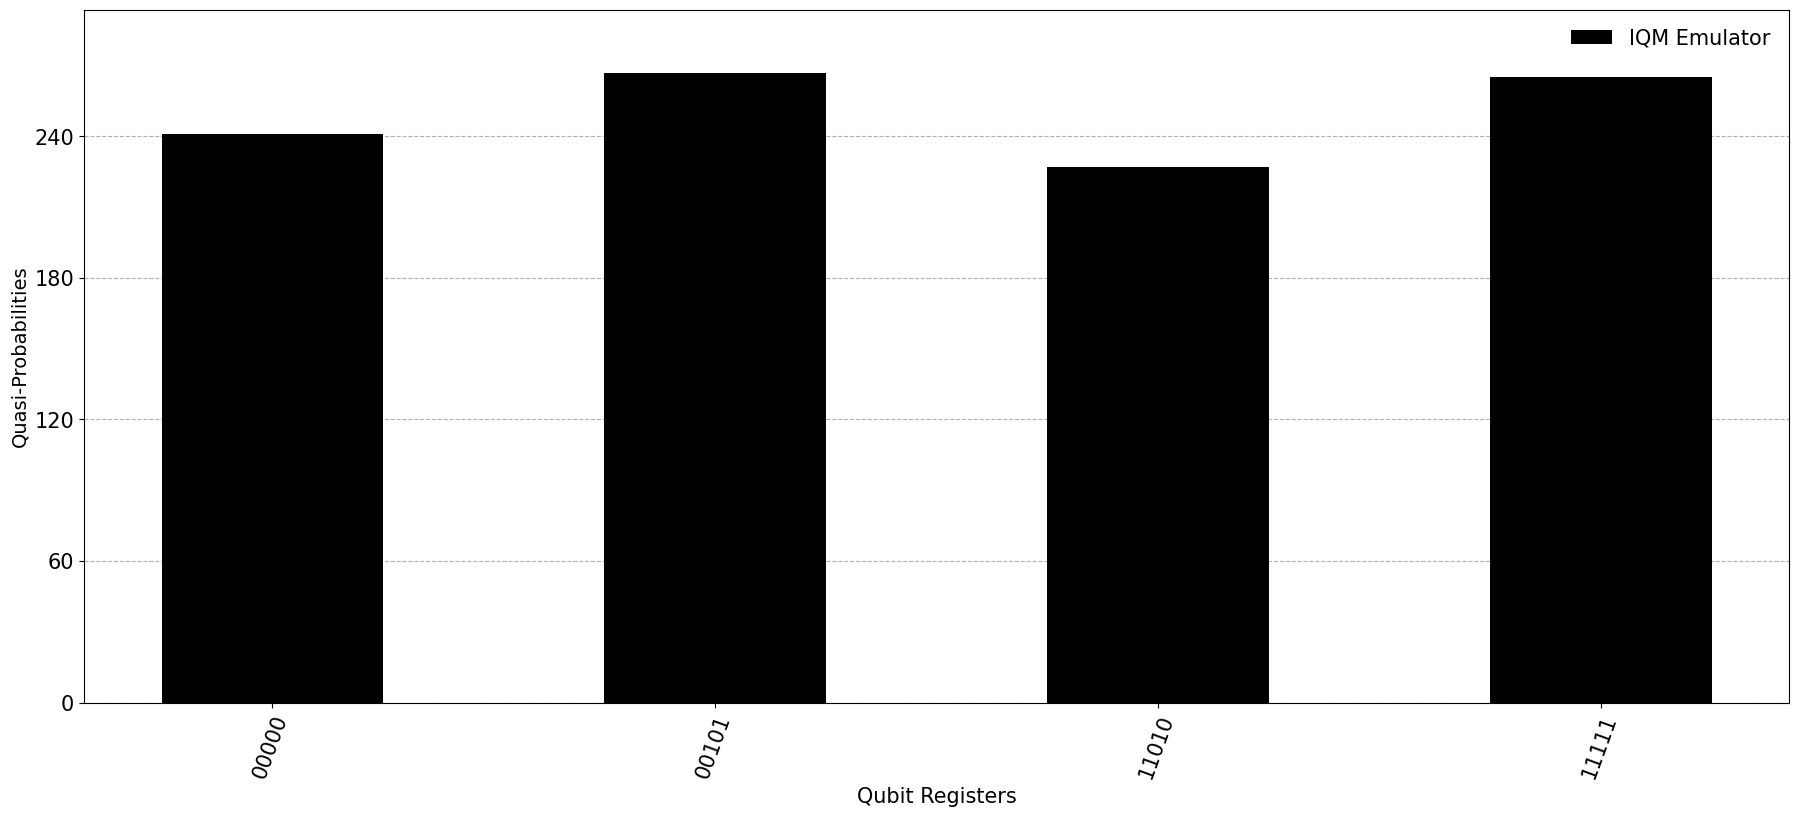

In [36]:
# IQM emulator and real hardware data
import json
from qiskit.visualization import plot_histogram

with open('./data/mock_data_task1b.json', 'r') as file:
    data = json.load(file)

total_count = data.values
print(total_count)
#print(data[0])

#qubit_patterns = [qubit_pattern for qubit_pattern, _ in data[0]['sorted_counts']]
#counts = [count for _, count in data[0]['sorted_counts']]

xtick_labels = ['IQM Emulator']
color_list = ['k', 'tab:red', 'tab:green', 'tab:blue', 'tab:cyan']
legend_list = [
    "IQM Emulator"
]
cases = 1

plt.rcParams.update({'font.size': 15})
fig, ax1 = plt.subplots(1, 1, figsize=(22, 9), facecolor="1")
plot_histogram(
    data,
    color=color_list[0:cases],
    bar_labels=False,
    legend=legend_list[0:cases],
    ax=ax1,
)
ax1.set_ylabel('Quasi-Probabilities')
ax1.set_xlabel('Qubit Registers')
ax1.legend(loc='best', frameon=False)

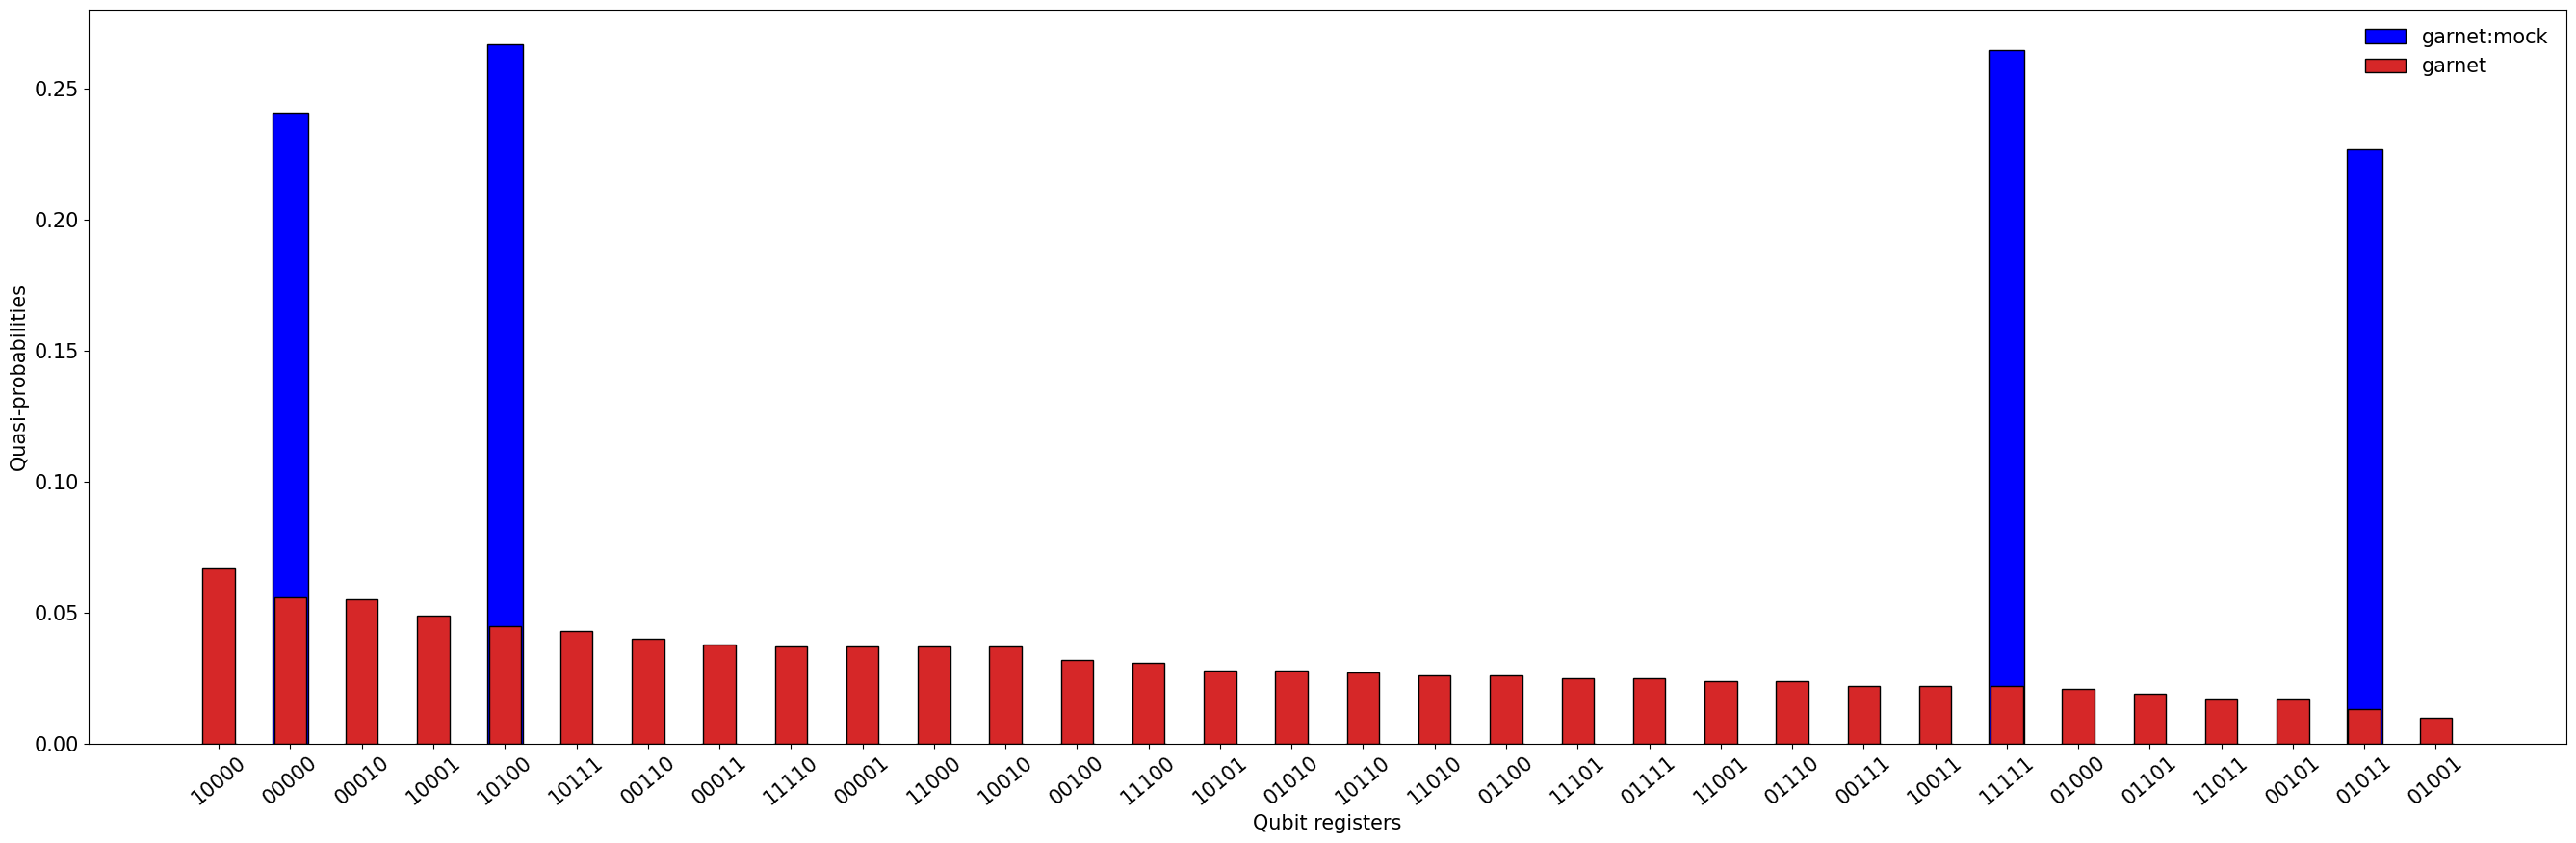

In [37]:
import json
import matplotlib.pyplot as plt

def load_counts(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return (data[0]['sorted_counts'], data[0]['total_counts'])


# Define color list, line styles, widths, and transparency
color_list = ['tab:red', 'tab:green', 'tab:blue',
              'tab:cyan', 'tab:grey', 'tab:orange']
line_styles = ['--', '-.', '-.', ':', '-']
widths = [0.8, 0.65, 0.5, 0.35, 0.2]
transparency = 1
backends = ['garnet:mock', 'garnet']




# Extract sorted counts
real_hardware_counts, real_hardware_total_count = load_counts('./data/job-results-real-hardware.json')
mock_counts, mock_total_count = load_counts('./data/job-results-mock.json')
counts = real_hardware_counts + mock_counts

# Ensure legend_list has enough entries
legend_list = [f"Run {i+1}" for i in range(len(counts))]  # Default labels

# Create plot
fig, ax = plt.subplots(figsize=(27, 9))

# Extract unique keys while preserving order
unique_keys = []
for register, _ in counts:
    if register not in unique_keys:
        unique_keys.append(register)

# Convert counts into dictionary form for easy lookup
real_hardware_counts_dicts = [{reg: cnt / real_hardware_total_count for reg, cnt in real_hardware_counts}]
mock_counts_dicts = [{reg: cnt / mock_total_count for reg, cnt in mock_counts}]


for i, count_dict in enumerate(mock_counts_dicts):
    y_values = [count_dict.get(key, 0) for key in unique_keys]

    ax.bar(unique_keys, y_values,
           color='b',
           alpha=transparency,
           width=0.5,
           label='garnet:mock',
           edgecolor='k')

# Plot bars for each run
for i, count_dict in enumerate(real_hardware_counts_dicts):
    y_values = [count_dict.get(key, 0) for key in unique_keys]

    ax.bar(unique_keys, y_values,
        color=color_list[i % len(color_list)],
        alpha=transparency,
        width=0.45,
        label='garnet',
        edgecolor='k')



# Configure labels and legend
ax.legend(loc='best', frameon=False)
ax.set_xlabel('Qubit registers')
ax.set_ylabel('Quasi-probabilities')

# Set x-axis ticks and labels
ax.set_xticks(range(len(unique_keys)))
ax.set_xticklabels(unique_keys, rotation=40)

fig.tight_layout()
plt.show()

## Task 2B Diagrams

In [38]:
# converting data to a csv file
import csv
import os

def read_fidelities(data_path, line_number):
    fidelities = []

    # using read_line to the fidelity from each file
    for path in os.listdir(data_path):
        line = read_line(os.path.join(data_path, path), line_number)
        fidelity = float(line.split()[1])
        # don't add fidelity from bad runs
        if not fidelity == 0.1:
            fidelities.append(fidelity)
    
    return fidelities


def write_to_csv(file_name, data):
    with open(file_name, mode="w", newline="") as file:
        writer = csv.writer(file)
        for row in data:
            writer.writerow([row])

mock_data_path = './data/task2b_mock_data'
real_hardware_data_path = './data/task2b_real_hardware_data'

mock_fidelities = read_fidelities(mock_data_path, 40)
real_hardware_fidelities = read_fidelities(real_hardware_data_path, 32)
print(real_hardware_fidelities)

# writing data to a csv file
write_to_csv('./data/mock_fidelities.csv', mock_fidelities)
write_to_csv('./data/real_hardware_fidelities.csv', real_hardware_fidelities)


[0.7526555303149327, 0.7976184687308664, 0.7929912906231386, 0.7877410151964356, 0.7924404642650692, 0.8313421361852631, 0.7213823784545578, 0.7296095921587014, 0.7726659242752488, 0.7668107229628025, 0.7880082679531256, 0.7943998713396743, 0.7972469352831814, 0.7725094621393118, 0.7634664597979789, 0.7626007531695091, 0.7980734559710894, 0.8027898673855018, 0.7909792799837639, 0.7767781120393217, 0.7729397277909992, 0.7906165385144839]


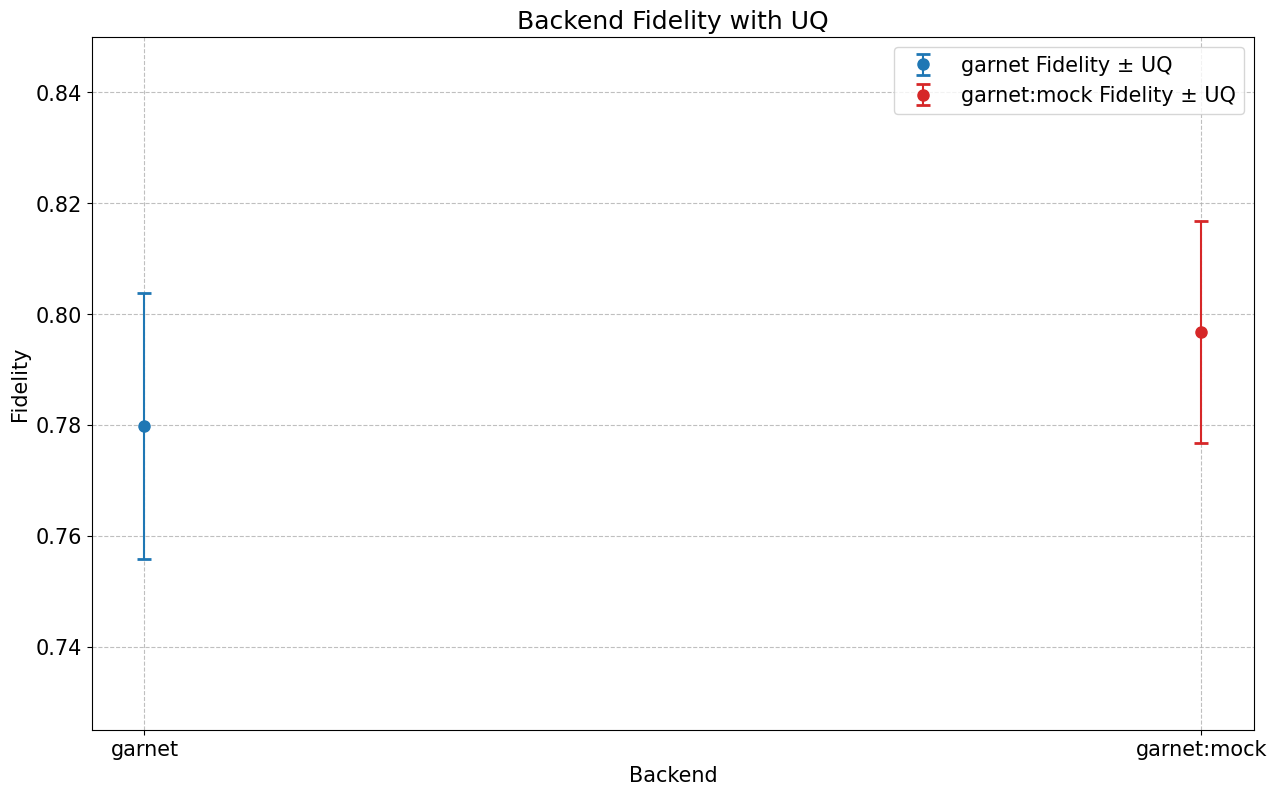

In [39]:
import numpy as np
# plotting error bars

# loading data
real_hardware_data_path = './data/real_hardware_fidelities.csv'
real_hardware_fidelities = np.loadtxt(real_hardware_data_path)

mock_data_path = './data/mock_fidelities.csv'
mock_fidelities = np.loadtxt(mock_data_path)

# calculating statistics
real_hardware_fidelity_mean = np.mean(real_hardware_fidelities)
real_hardware_fidelity_std = np.std(real_hardware_fidelities)

mock_fidelity_mean = np.mean(mock_fidelities)
mock_fidelity_std = np.std(mock_fidelities)

x_labels = ['garnet', 'garnet:mock']

# Plot with error bars
plt.figure(figsize=(15, 9))
plt.errorbar(
    x_labels[0],
    [real_hardware_fidelity_mean],
    yerr=[real_hardware_fidelity_std],
    fmt='o',
    capsize=5,
    capthick=2,
    markersize=8,
    color='tab:blue',
    label="garnet Fidelity ± UQ"
)
plt.errorbar(
    x_labels[1],
    [mock_fidelity_mean],
    yerr=[mock_fidelity_std],
    fmt='o',
    capsize=5,
    capthick=2,
    markersize=8,
    color='tab:red',
    label="garnet:mock Fidelity ± UQ"
)
plt.ylabel("Fidelity")
plt.xlabel("Backend")
plt.title("Backend Fidelity with UQ")
plt.ylim(0.725, 0.85)
plt.grid(True, linestyle="--", alpha=0.8)
plt.legend()
plt.show()